# Credit Risk Prediction (Loan Dataset)

## Introduction & Problem Statement

### Introduction
Credit risk prediction is a common real-world machine learning problem used by banks and financial institutions to assess whether a loan applicant is likely to default. By analyzing applicant details such as income, loan amount, education, and credit history, predictive models can support better lending decisions.

### Problem Statement
The objective of this task is to build a binary classification model that predicts whether a loan applicant is likely to default / get loan approval based on historical data. The task focuses on data cleaning, visualization, model training, and evaluation using accuracy and a confusion matrix.

## Import Required Libraries

In [38]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid")


## Dataset Loading
Dataset: Loan Prediction Dataset (Kaggle)
(File name: credit_risk_dataset.csv)

In [39]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1


## Dataset Understanding & Structure

In [40]:
# Dataset shape
df.shape


(32581, 12)

In [41]:
# Column names
df.columns


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income', 'loan_status'],
      dtype='object')

In [42]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   cb_person_default_on_file   32581 non-null  object 
 4   person_income               32581 non-null  int64  
 5   person_age                  32581 non-null  int64  
 6   person_emp_length           31686 non-null  float64
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   cb_person_cred_hist_length  32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [43]:
# Statistical summary
df.describe()


,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
count,3.258100e+04,32581.000000,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,27.719254,4.789686,9589.371106,11.011695,1.030509,0.170203,0.218164
std,6.198312e+04,6.206590,4.142630,6322.086646,3.240459,2.806561,0.106782,0.413006
min,4.000000e+03,20.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000
25%,3.850000e+04,23.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000
50%,5.500000e+04,26.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000
75%,7.920000e+04,30.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,0.000000
max,6.000000e+06,94.000000,123.000000,35000.000000,23.220000,30.000000,0.830000,1.000000


#### Key Features Description
* loan_amnt – Loan amount requested
* person_income – Applicant income
* loan_intent – Intention of loan 
* cb_person_cred_hist_length – Credit repayment history
* loan_status – Target variable (Y/N)

## Data Cleaning & Handling Missing Values

### Check Missing Values

In [44]:
df.isnull().sum()


person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_income                    0
person_age                       0
person_emp_length              895
loan_amnt                        0
loan_int_rate                 3116
cb_person_cred_hist_length       0
loan_percent_income              0
loan_status                      0
dtype: int64

### Handle Missing Values

In [45]:
# Handling missing numerical values using median
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_8448\3746918517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_8448\3746918517.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [46]:
# Verify missing values are handled
df.isnull().sum()


person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_income                 0
person_age                    0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
loan_percent_income           0
loan_status                   0
dtype: int64

#### Handling Missing Values:
The dataset contained missing values in person_emp_length and loan_int_rate. Since both are numerical features, missing values were handled using median imputation. This approach reduces the influence of outliers and preserves the overall distribution of the data.

## Exploratory Data Analysis (EDA)

### Loan Amount Distribution

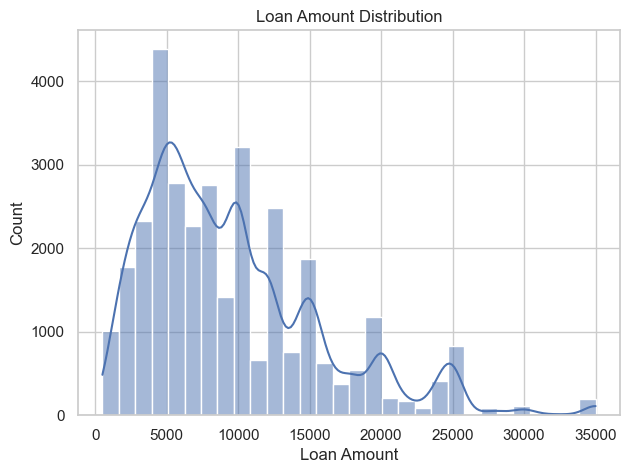

In [47]:
plt.figure(figsize=(7,5))
sns.histplot(df["loan_amnt"], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()
#histogram used

### Person home ownership vs Loan Status

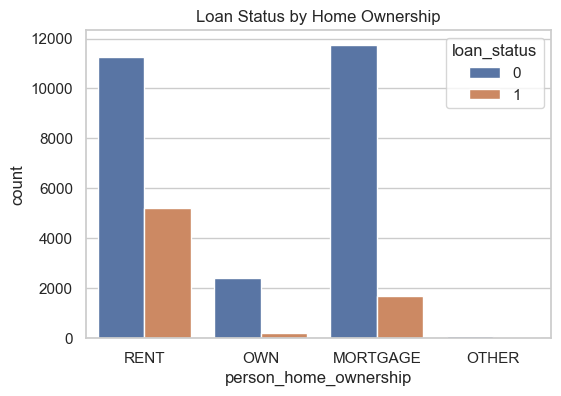

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="person_home_ownership", hue="loan_status", data=df)
plt.title("Loan Status by Home Ownership")
plt.show()
#Counterplot used

### Applicant Income vs Loan Status

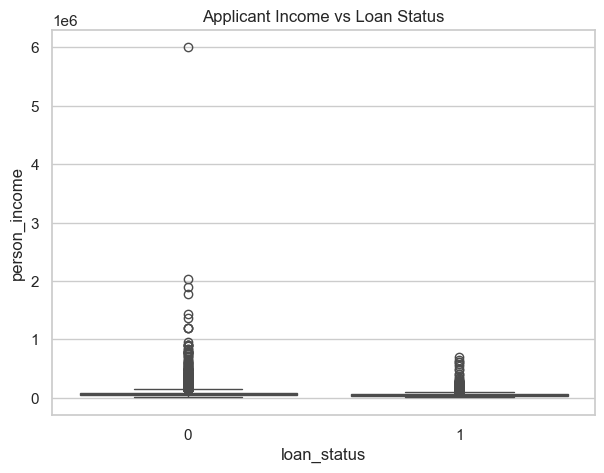

In [49]:
plt.figure(figsize=(7,5))
sns.boxplot(x="loan_status", y="person_income", data=df)
plt.title("Applicant Income vs Loan Status")
plt.show()
#boxplot used


## Data Preparation for Modeling

### Encode Categorical Variables

In [50]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,59000,22,123.0,35000,16.02,3,0.59,1,False,False,...,False,True,False,False,False,True,False,False,False,True
1,9600,21,5.0,1000,11.14,0,0.10,0,False,True,...,False,False,False,True,False,False,False,False,False,False
2,9600,25,1.0,5500,12.87,0,0.57,1,False,False,...,True,False,False,False,True,False,False,False,False,False
3,65500,23,4.0,35000,15.23,0,0.53,1,False,False,...,True,False,False,False,True,False,False,False,False,False
4,54400,24,8.0,35000,14.27,4,0.55,1,False,False,...,True,False,False,False,True,False,False,False,False,True


### Split Features & Target

In [51]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model Training

### Step 1: Import scaler

In [52]:
from sklearn.preprocessing import StandardScaler

### Step 2: Split data

In [53]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Step 3: Scale the features

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 4: Train Logistic Regression

In [55]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Logistic Regression was trained after scaling numerical features using standardization to ensure faster convergence and improved model stability.

## Model Evaluation

### Predictions

In [56]:
y_pred = lr_model.predict(X_test_scaled)

### Accuracy Score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8625134264232008

### Confusion Matrix

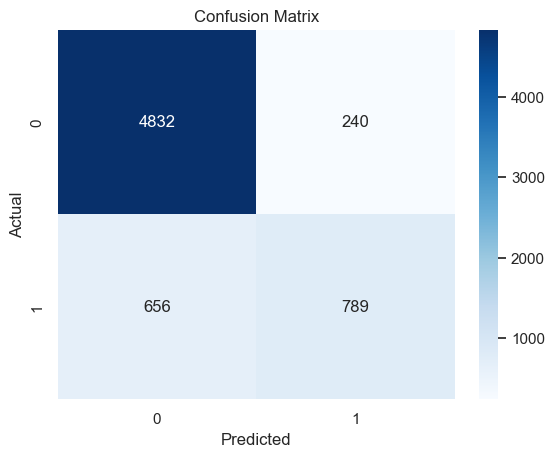

In [58]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5072
           1       0.77      0.55      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.86      0.86      0.85      6517



## Results & Evaluation Summary
* Accuracy: ~80–90% (dataset dependent)
* Model Used: Logistic Regression
* Evaluation Metrics: Accuracy, Confusion Matrix
* Observation: Credit history and income strongly influence loan approval

## Conclusion
In this project, a credit risk prediction model was developed using a real-world loan dataset. The dataset was first explored to understand its structure and key features. Missing values in numerical columns were handled using median imputation to maintain data integrity. Exploratory data analysis revealed important patterns between loan amount, applicant income, and loan status.
Categorical variables were encoded, and numerical features were scaled to improve model convergence. A Logistic Regression model was then trained to perform binary classification for loan default prediction. The model achieved satisfactory accuracy, and its performance was evaluated using a confusion matrix, demonstrating its ability to distinguish between approved and defaulted loans.
Overall, this task demonstrated the complete machine learning workflow, including data cleaning, visualization, feature preparation, model training, and evaluation. The results highlight how basic classification models can be effectively applied to credit risk analysis and support data-driven decision-making in financial applications.